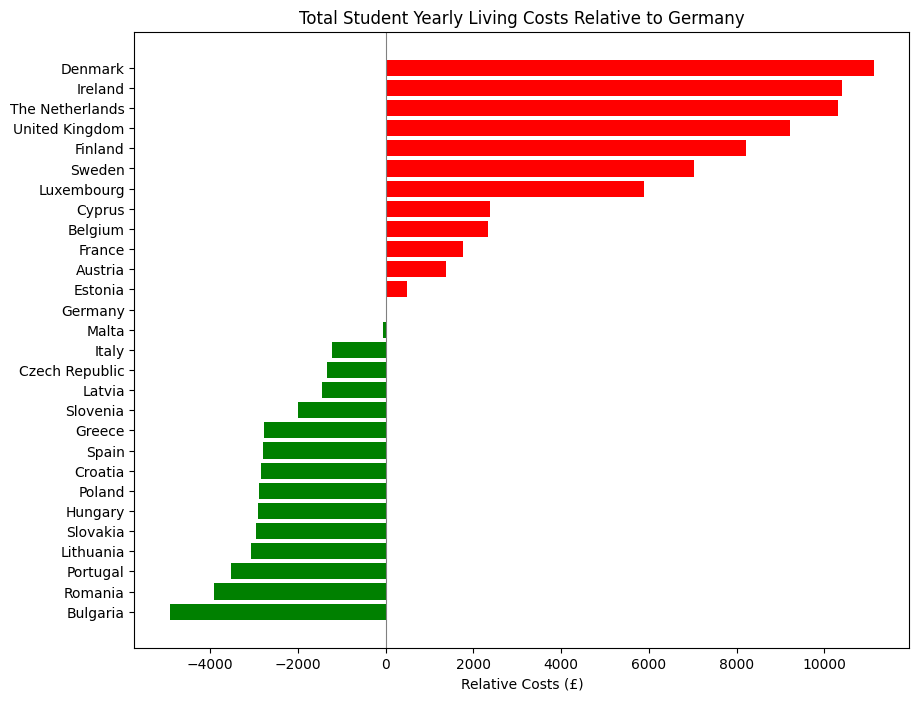

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly
from plotly.offline import iplot
import plotly.graph_objects as go
from ipywidgets import interact, Dropdown


# Load the data
data = pd.read_excel('cheapest_countries_to_study_Europe_2023.xlsx')

# Calculate relative costs to Germany
germany_cost= data[data.Country=='Germany']['Total yearly living costs and fees (£)'].values[0]
data['Relative to Germany (£)'] = data['Total yearly living costs and fees (£)']-germany_cost

# Sort data by relative costs
data = data.sort_values(by='Relative to Germany (£)')

# Create diverging bars
plt.figure(figsize=(10, 8))
plt.barh(data['Country'], data['Relative to Germany (£)'], color=(data['Relative to Germany (£)'] > 0).map({True: 'red', False: 'green'}))
plt.axvline(x=0, color='grey', linewidth=0.8)
plt.title('Total Student Yearly Living Costs Relative to Germany')
plt.xlabel('Relative Costs (£)')
plt.show()

In [6]:

def update_plot(selected_country):
    # Work with a copy to avoid modifying the original DataFrame repeatedly
    local_data = data.copy()
    
    # Calculate relative costs to the selected country
    reference_costs = local_data[local_data['Country'] == selected_country]['Yearly student living costs (£)'].values[0]
    local_data['Relative to Selected Country (£)'] = local_data['Yearly student living costs (£)'] - reference_costs
    
    # Sort data by relative costs
    local_data = local_data.sort_values(by='Relative to Selected Country (£)')

    # Create the figure
    fig = go.FigureWidget(data=[
        go.Bar(
            y=local_data['Country'],
            x=local_data['Relative to Selected Country (£)'],
            orientation='h',
            marker_color=['red' if x > 0 else 'green' for x in local_data['Relative to Selected Country (£)']]
        )
    ])
    
    # Add zero line for reference
    fig.add_shape(
        type="line",
        x0=0, y0=-0.5, x1=0, y1=len(local_data['Country'])-0.5,
        line=dict(color="Grey", width=2)
    )
    
    # Update layout to clean up and format properly
    fig.update_layout(
        title=f'Yearly Student Living Costs Relative to {selected_country}',
        xaxis_title="Relative Costs (£)",
        yaxis_title="Country",
        showlegend=False
    )
    fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = np.array(range(len(local_data['Country']))),
        ticktext = local_data['Country']
    )
    )
    iplot(fig)

# Dropdown widget for country selection
country_dropdown = Dropdown(
    options=data['Country'].unique(),
    value='Germany',  # Assuming Germany is in the dataset
    description='Select Country:',
    disabled=False,
)

# Display interactive widget
i=interact(update_plot, selected_country=country_dropdown)



interactive(children=(Dropdown(description='Select Country:', index=15, options=('Bulgaria', 'Romania', 'Portu…

In [ ]:
## Connect with chartstudio
username = '' # Add your username
api_key = '' # Add your api key 

chart_studio.tools.set_credentials_file(username = username, api_key = api_key)

In [ ]:
import chart_studio.plotly as py
import chart_studio
py.plot(i, filename = 'diverging_graph', auto_open=True)
